<a href="https://colab.research.google.com/github/anadya-s/digit-classifier-numpy/blob/main/digit_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install numpy np scikit-learn

  Preparing metadata (setup.py) ... done
  Created wheel for np: filename=np-1.0.2-py3-none-any.whl size=13657 sha256=678137d7a4e98f2a67e2cbb9c200af36c463b27312d5f08c6434b3218b6b637e
  Stored in directory: /root/.cache/pip/wheels/19/20/42/6ee214e617f78123903f603524d662ac6fa14154c3027fd992
Successfully built np


In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
Y = digits.target.reshape(-1, 1)

Data shape:  (1797, 64)
Labels shape:  (1797, 1)


<Figure size 640x480 with 0 Axes>

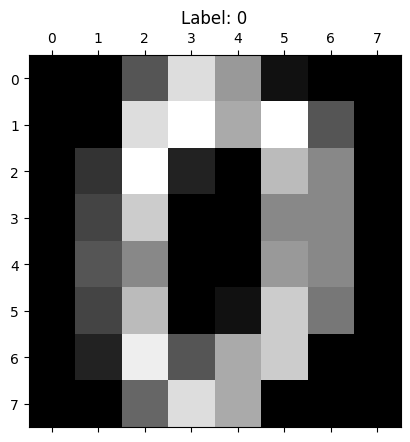

In [15]:
print("Data shape: ", X.shape)
print("Labels shape: ", Y.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.title(f"Label: {digits.target[0]}")
plt.show()

In [16]:
# normalizing input
X = digits.data/16.0

In [17]:
import numpy as np

In [18]:
# one-hot output labels
def one_hot(y, num_classes=10):
    m = y.shape[0]
    y_one_hot = np.zeros((m, num_classes))
    y_one_hot[np.arange(m), y] = 1
    return y_one_hot

Y = one_hot(digits.target)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
print("X_train:", X_train.shape)
print("Y_train:", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test:", Y_test.shape)

X_train: (1437, 64)
Y_train: (1437, 10)
X_test: (360, 64)
Y_test: (360, 10)


In [25]:
def initialize_parameters(layer_dims):
  np.random.seed(1)
  parameters = {}
  L = len(layer_dims)
  for l in range (1, L):
    parameters["W"+str(l)]=np.random.randn(layer_dims[l], layer_dims[l-1])*0.01
    parameters["b"+str(l)]=np.zeros((layer_dims[l], 1))
  return parameters


In [26]:
layer_dims = [64, 128, 64, 10]
parameters = initialize_parameters(layer_dims)

In [27]:
def Relu(Z):
  return np.maximum(0,Z)
def Softmax(Z):
  expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
  return expZ / np.sum(expZ, axis=0, keepdims=True)

In [28]:
def forward_propagation(X, parameters):
  cache={}
  Z1 = np.dot(parameters["W1"], X) + parameters["b1"]
  A1 = Relu(Z1)
  Z2 = np.dot(parameters["W2"], A1) + parameters["b2"]
  A2 = Relu(Z2)
  Z3 = np.dot(parameters["W3"], A2) + parameters["b3"]
  A3 = Softmax(Z3)

  cache["A0"] = X
  cache["Z1"] = Z1
  cache["A1"] = A1
  cache["Z2"] = Z2
  cache["A2"] = A2
  cache["Z3"] = Z3
  cache["A3"] = A3

  return A3, cache

In [29]:
def compute_cost(A3, Y):
  m = Y.shape[1]
  cost = -np.sum(np.multiply(np.log(A3), Y) + np.multiply(1 - Y, np.log(1 - A3)))/m
  cost = np.squeeze(cost)
  return cost

In [30]:
def relu_derivative(Z):
    return Z > 0

In [31]:
def backward_propagation(parameters, cache, X, Y):
  m = Y.shape[1]
  W1, W2, W3 = parameters["W1"], parameters["W2"], parameters["W3"]
  A1, A2, A3 = cache["A1"], cache["A2"], cache["A3"]
  Z1, Z2, Z3 = cache["Z1"], cache["Z2"], cache["Z3"]
  dZ3 = A3 - Y
  dW3 = (1/m) * np.dot(dZ3, A2.T)
  db3 = (1/m) * np.sum(dZ3, axis=1, keepdims=True)

  dA2 = np.dot(W3.T, dZ3)
  dZ2 = dA2 * relu_derivative(Z2)
  dW2 = (1/m) * np.dot(dZ2, A1.T)
  db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

  dA1 = np.dot(W2.T, dZ2)
  dZ1 = dA1 * relu_derivative(Z1)
  dW1 = (1/m) * np.dot(dZ1, X.T)
  db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

  grads = {
      "dW1": dW1, "db1": db1,
      "dW2": dW2, "db2": db2,
      "dW3": dW3, "db3": db3
  }

  return grads

In [32]:
def update_parameters(parameters, grads, learning_rate):
  parameters["W1"] -= learning_rate * grads["dW1"]
  parameters["b1"] -= learning_rate * grads["db1"]
  parameters["W2"] -= learning_rate * grads["dW2"]
  parameters["b2"] -= learning_rate * grads["db2"]
  parameters["W3"] -= learning_rate * grads["dW3"]
  parameters["b3"] -= learning_rate * grads["db3"]
  return parameters

In [36]:
def final_model(X, Y, layer_dims, learning_rate=0.1, num_iterations=1000, print_cost=False):
  parameters = initialize_parameters(layer_dims)
  for i in range(num_iterations):
    A3, cache = forward_propagation(X, parameters)
    cost = compute_cost(A3, Y)
    grads = backward_propagation(parameters, cache, X, Y)
    parameters = update_parameters(parameters, grads, learning_rate)
    if print_cost and i % 100 == 0:
      print("Cost after iteration", i, ": ", np.squeeze(cost))

  return parameters

In [37]:
parameters = final_model(X_train.T, Y_train.T, layer_dims=[64, 128, 64, 10], learning_rate=0.1, num_iterations=1000, print_cost=True)

Cost after iteration 0 :  3.250831411081749
Cost after iteration 100 :  3.249871937241957
Cost after iteration 200 :  3.249453697324685
Cost after iteration 300 :  3.2488167061402753
Cost after iteration 400 :  3.2472897448971776
Cost after iteration 500 :  3.2417828786046554
Cost after iteration 600 :  3.1948131655433616
Cost after iteration 700 :  2.62227671278564
Cost after iteration 800 :  1.5720794988057805
Cost after iteration 900 :  0.9777381822694784


In [38]:
def predict(X, parameters):
  A3, cache = forward_propagation(X, parameters)
  predictions = np.argmax(A3, axis=0)
  return predictions

In [39]:
pred_train = predict(X_train.T, parameters)
pred_test = predict(X_test.T, parameters)

print("Train accuracy:", np.mean(pred_train == np.argmax(Y_train.T, axis=0)))
print("Test accuracy:", np.mean(pred_test == np.argmax(Y_test.T, axis=0)))

Train accuracy: 0.8559498956158664
Test accuracy: 0.8361111111111111


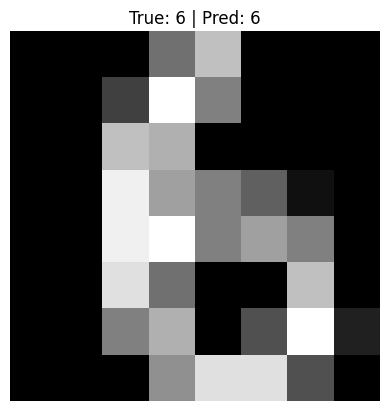

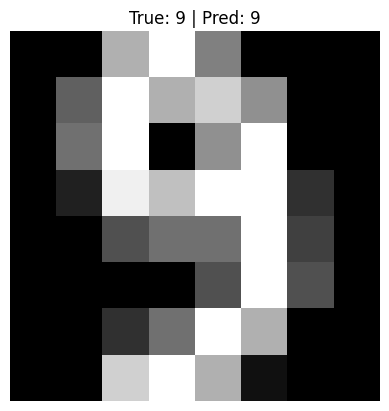

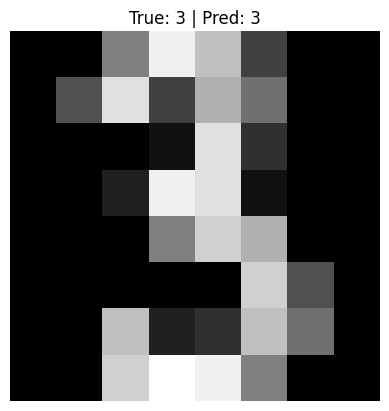

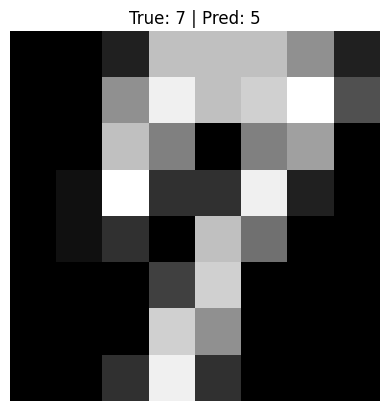

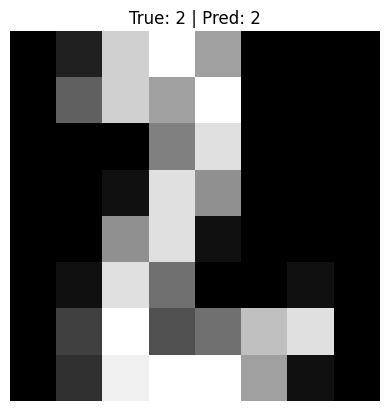

In [40]:
import matplotlib.pyplot as plt

pred_test = predict(X_test.T, parameters)
true_test = np.argmax(Y_test.T, axis=0)

for i in range(5):
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
    plt.title(f"True: {true_test[i]} | Pred: {pred_test[i]}")
    plt.axis('off')
    plt.show()